






<h2 id='part1'>A Look at the Data</h2>

In order to get a better understanding of the data we will be looking at throughout this lesson, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from IPython.display import HTML
%matplotlib inline

# Loading the dataset and displaying the first few rows

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
print(df.columns)



Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)


In [3]:
# CRISP-DM Phase 2: Data Understanding
def load_data(file_path):
    """Loads the dataset and returns a pandas DataFrame."""
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully!")
        return df
    except FileNotFoundError:
        print("Error: File not found.")
        return None

In [4]:
# CRISP-DM Phase 2: Data Understanding
def explore_data(df):
    """Displays basic information about the dataset."""
    if df is not None:
        print("\nDataset Overview:")
        display(df.head())
        print("\nColumn Names:")
        print(df.columns.tolist())
        print("\nShape of the dataset:")
        print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    else:
        print("No data available for exploration.")



In [5]:
# CRISP-DM Phase 3: Data Preparation
def preprocess_data(df):
    """Handles missing values and prepares data for analysis."""
    if df is not None:
        df = df.dropna()  # Example: Drop missing values
        print("\nData preprocessing completed. Missing values removed.")
        return df
    else:
        return None

# ### Business Questions


# 1. What are the most  Popular Programming Languages
# 2. What is the average Salary by Country
# 3. What is the distribution of developers' job satisfaction?




<h3 id='q1'>Question 1</h3>

**1.** Number of Rows and Columns 


We first calculate and verify the number of rows and columns in the dataset.



In [6]:

num_rows = df.shape[0]
num_cols = df.shape[1]

print(f"There are {num_rows} rows in the dataset!")
print(f"There are {num_cols} columns in the dataset!")

There are 19102 rows in the dataset!
There are 154 columns in the dataset!


In [7]:

flipped_num_rows = df.shape[1] 
flipped_num_cols = df.shape[0] 

t.check_rows_cols(flipped_num_rows, flipped_num_cols) 

That doesn't look like what we were expecting for the number of rows.
That doesn't look like what we were expecting for the number of columns.


In [8]:
# If you want to know more about what the test function is expecting, 
# you can read the documentation the same way as any other funtion

t.check_rows_cols?



### Question 2|  Most Popular Programming Languages
Count and display the most commonly used programming languages

In [9]:
def analyze_languages(df):
    """Analyzes the most common programming languages from the dataset."""
    if 'HaveWorkedLanguage' in df.columns:
        language_data = df['HaveWorkedLanguage'].dropna()

        # Split the strings into lists of languages and flatten the list
        language_list = language_data.str.split(';')
        flattened_languages = [lang for sublist in language_list for lang in sublist]  # Flatten the list

        # Count occurrences of each language
        language_counts = Counter(flattened_languages)

        # Convert the counts to a Pandas Series for easier handling
        language_counts_series = pd.Series(language_counts).sort_values(ascending=False)

        # Display the top 10 programming languages
        print("Top 10 Programming Languages:")
        print(language_counts_series.head(10))

        # Plot the results
        plt.figure(figsize=(10, 6))
        language_counts_series.head(10).plot(kind='bar', color='skyblue')
        plt.title('Top 10 Programming Languages (2017)', fontsize=16)
        plt.xlabel('Programming Languages', fontsize=12)
        plt.ylabel('Number of Developers', fontsize=12)
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("The column 'HaveWorkedLanguage' is not present in the dataset.")

# CRISP-DM Phase 5: Evaluation
def evaluate_results(df):
    """Checks if the dataset includes data for analysis and prints a summary."""
    if df is not None and not df.empty:
        print("\nEvaluation Summary:")
        print("The dataset contains valid data for analysis.")
    else:
        print("The dataset is empty or invalid.")

### Question 3 | Average Salary by Country
Calculate and visualize the average salary per country.



Top 10 Countries by Average Salary:
Country
Bermuda          150000.000000
Kuwait           115200.000000
Puerto Rico      114000.000000
United States     98722.138493
Switzerland       94568.813565
Liechtenstein     93766.666667
Venezuela         85311.004785
Norway            79553.226268
Australia         71912.852437
Denmark           67618.178948
Name: Salary, dtype: float64


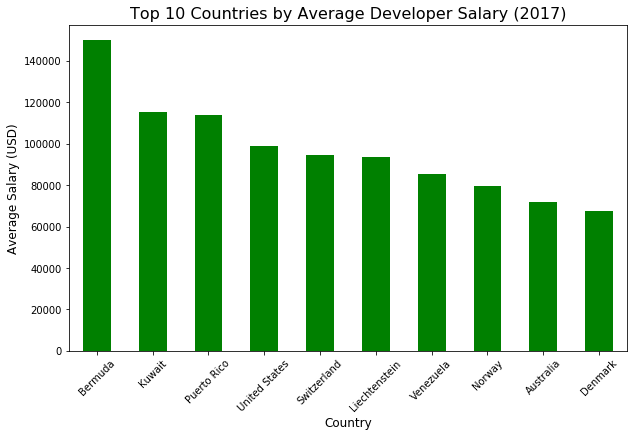

In [10]:
# Check if 'Country' and 'Salary' columns are present
if 'Country' in df.columns and 'Salary' in df.columns:
    # Filter out rows with missing or extreme salary values
    salary_data = df[['Country', 'Salary']].dropna()
    salary_data = salary_data[salary_data['Salary'] <= 300000]  # Cap at $300K for analysis

    # Group by country and calculate average salary
    avg_salary_by_country = salary_data.groupby('Country')['Salary'].mean().sort_values(ascending=False)

    # Display the top 10 countries
    print("Top 10 Countries by Average Salary:")
    print(avg_salary_by_country.head(10))

    # Plot the results
    plt.figure(figsize=(10, 6))
    avg_salary_by_country.head(10).plot(kind='bar', color='green')
    plt.title('Top 10 Countries by Average Developer Salary (2017)', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Average Salary (USD)', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The columns 'Country' and/or 'Salary' are not present in the dataset.")


### Question 4 | What is the distribution of developers' job satisfaction?
We will analyze how developers rated their job satisfaction and visualize its distribution


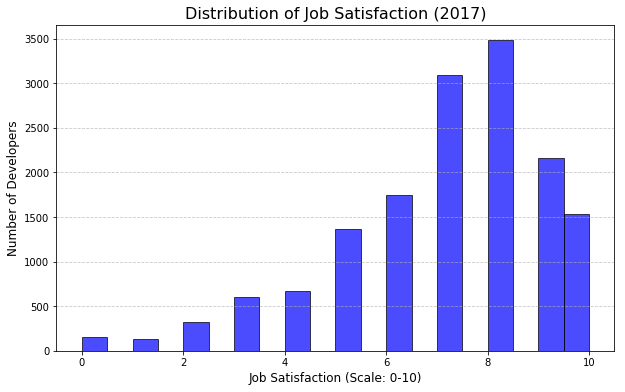

Job Satisfaction Statistics:
count    15253.000000
mean         7.000721
std          2.128648
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSatisfaction, dtype: float64


In [11]:
# Check if the relevant column is present in the dataset
if 'JobSatisfaction' in df.columns:
    # Drop rows with missing job satisfaction values
    job_satisfaction_data = df['JobSatisfaction'].dropna()

    # Plot the histogram of job satisfaction
    plt.figure(figsize=(10, 6))
    plt.hist(job_satisfaction_data, bins=20, color='blue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Job Satisfaction (2017)', fontsize=16)
    plt.xlabel('Job Satisfaction (Scale: 0-10)', fontsize=12)
    plt.ylabel('Number of Developers', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Print basic statistics
    print("Job Satisfaction Statistics:")
    print(job_satisfaction_data.describe())
else:
    print("The column 'JobSatisfaction' is not present in the dataset.")


In [12]:
# Main Execution
if __name__ == "__main__":
    file_path = "./survey_results_public.csv"
    df = load_data(file_path)
    explore_data(df)
    df = preprocess_data(df)

# ### CRISP-DM Process
# Step 1: Business Understanding - Identify key questions about the data.
# Step 2: Data Understanding - Load and clean data.
# Step 3: Data Preparation - Handle missing values and format data.
# Step 4: Modeling - Analyze relationships (e.g., salary by country).
# Step 5: Evaluation - Review insights and validate questions.
# Step 6: Deployment - Publish results to GitHub.


Data loaded successfully!

Dataset Overview:


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Column Names:
['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobC